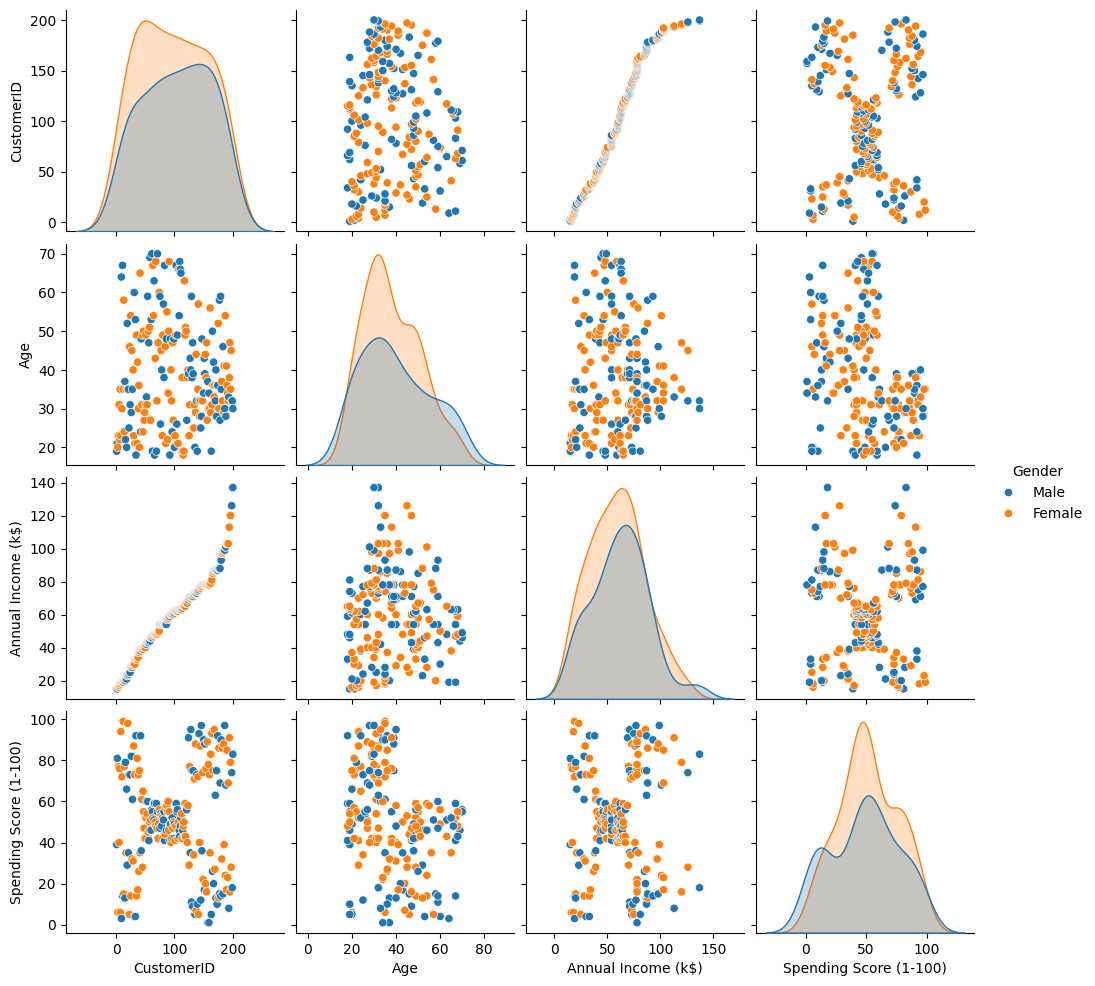

In [4]:
import pandas as pd
df = pd.read_csv('/content/Mall_Customers.csv')

import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='Gender')
plt.show()

In [5]:
import pandas as pd
from sklearn.cluster import KMeans

# Ensure that the DataFrame 'df' is created by running the previous cell
# where the data is loaded.

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init='auto')

df['Clusters'] = kmeans.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])

print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Clusters  
0         4  
1         2  
2         4  
3         2  
4         4  


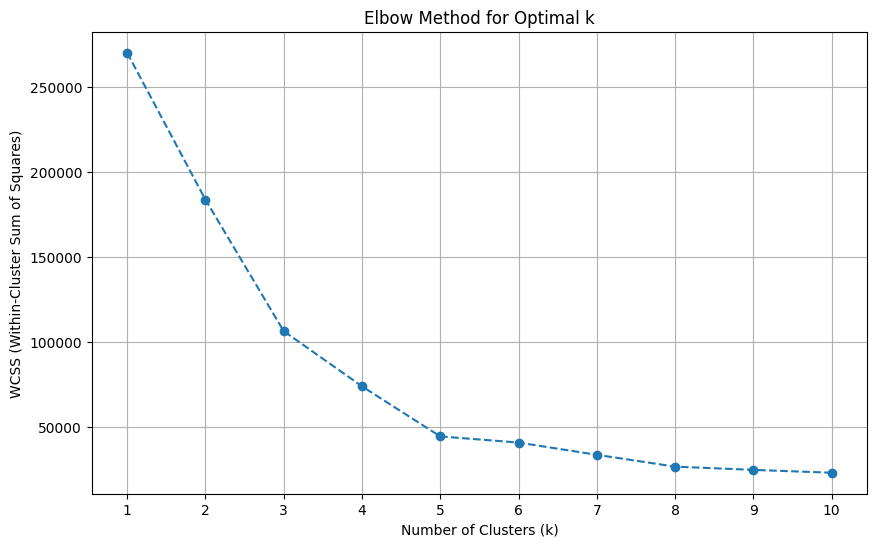

In [6]:


import matplotlib.pyplot as plt
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Use the elbow method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init='auto')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

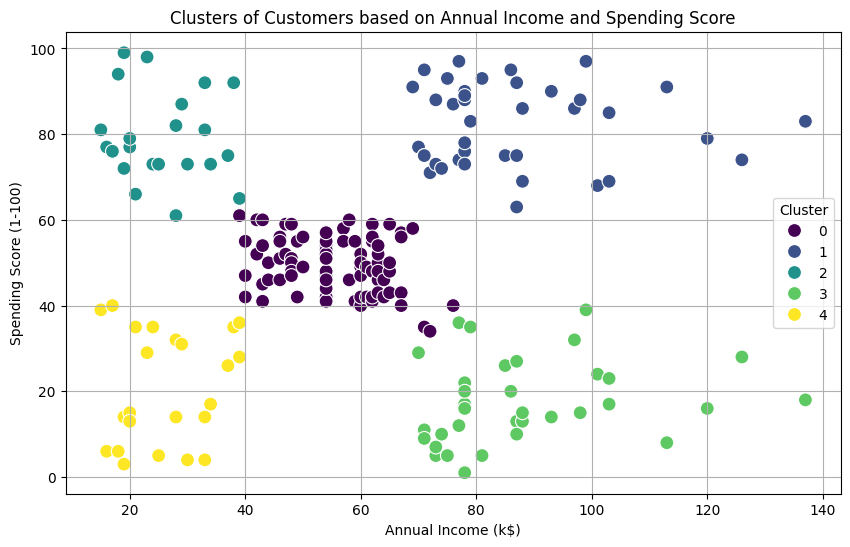

In [7]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Clusters', data=df, palette='viridis', s=100)
plt.title('Clusters of Customers based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [8]:


from sklearn.metrics import silhouette_score
if len(df['Clusters'].unique()) > 1:
  silhouette_avg = silhouette_score(X, df['Clusters'])
  print(f"Silhouette Score: {silhouette_avg}")
else:
  print("Silhouette score cannot be calculated as there is only one cluster.")

Silhouette Score: 0.553931997444648
